<a href="https://colab.research.google.com/github/ishita48/S49200_Machine_Learning_Assignment/blob/main/hw41.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1: Performance Measures for Evaluating a Binary Classifier  

In [2]:
# Generate two arrays with 10 elements and each element is randomly either 0 or 1
# Variable "actual" array is referred to actual target or label
# Variable "predicted" array is referred to the prediction from a machine learningn model

import numpy as np

np.random.seed(42)

# Create an array of 10 random integers between 0 and 1
actual = np.random.randint(0, 2, 10)

# Create another array of 10 random integers between 0 and 1
predicted = np.random.randint(0, 2, 10)

# Print the two arrays
print("Actual:", actual)
print("Predicted:", predicted)


Actual: [0 1 0 0 0 1 0 0 0 1]
Predicted: [0 0 0 0 1 0 1 1 1 0]


In [4]:
# TODO: calculate accuracy
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(actual, predicted)
print(f"Accuracy: {accuracy:.4f}")


Accuracy: 0.3


Confusion Matrix:
[[3 4]
 [3 0]]


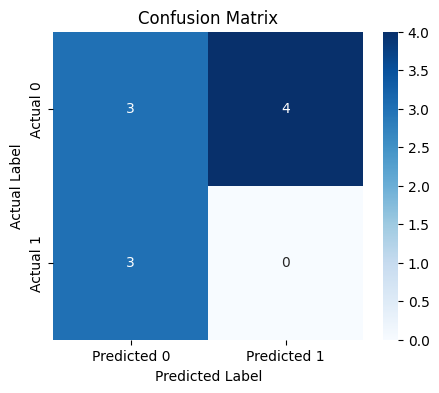

In [ ]:
# TODO: show confusion matrices
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(actual, predicted)
print("Confusion Matrix:")
print(cm)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Predicted 0", "Predicted 1"], yticklabels=["Actual 0", "Actual 1"])
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
# TODO: show precision, recall, and F1 score

precision = precision_score(actual, predicted)
recall = recall_score(actual, predicted)
f1 = f1_score(actual, predicted)
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Precision: 0.00
Recall: 0.00
F1-Score: 0.00


In [ ]:
# TODO: show TNR, FPR, FNR, and TPR
TN, FP, FN, TP = cm.ravel()
TNR = TN / (TN + FP)
FPR = FP / (TN + FP)
FNR = FN / (FN + TP)
TPR = TP / (FN + TP)
rates = {
    "True Negative Rate (TNR)": TNR,
    "False Positive Rate (FPR)": FPR,
    "False Negative Rate (FNR)": FNR,
    "True Positive Rate (TPR)": TPR,
}
# Print the calculated rates
print(f"True Negative Rate (TNR): {TNR:.2f}")
print(f"False Positive Rate (FPR): {FPR:.2f}")
print(f"False Negative Rate (FNR): {FNR:.2f}")
print(f"True Positive Rate (TPR): {TPR:.2f}")


True Negative Rate (TNR): 0.43
False Positive Rate (FPR): 0.57
False Negative Rate (FNR): 1.00
True Positive Rate (TPR): 0.00


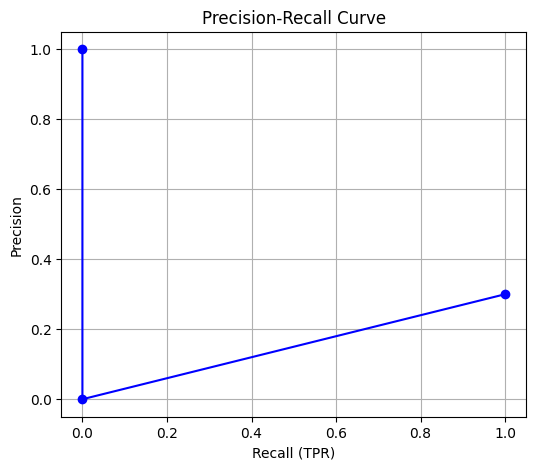

In [ ]:
# TODO: show the precision vs. recall plot
from sklearn.metrics import precision_recall_curve
precision, recall, _ = precision_recall_curve(actual, predicted)

# Plot Precision-Recall curve
plt.figure(figsize=(6, 5))
plt.plot(recall, precision, marker='o', linestyle='-', color='b')
plt.xlabel("Recall (TPR)")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.grid(True)
plt.show()


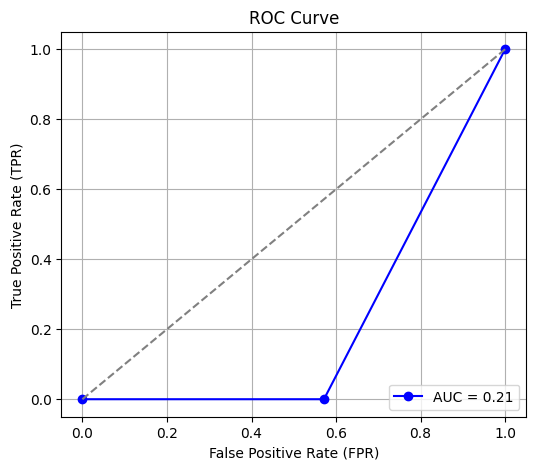

In [ ]:
# TODO: show the ROC curve plot
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(actual, predicted)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, marker='o', linestyle='-', color='b', label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal reference line
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()



In [ ]:
# TODO: Calcuate ROC AUC score
from sklearn.metrics import roc_auc_score

# Compute ROC AUC score
roc_auc = roc_auc_score(actual, predicted)

# Print the ROC AUC score
roc_auc

0.2142857142857143

# Part 2: Performance Measures for Evaluating a multiclass Classifier

In [ ]:
# Generate two arrays with 10 elements and each element is randomly between 0 or 4
# Variable "actual" array is referred to actual target or label
# Variable "predicted" array is referred to the prediction from a machine learningn model

import numpy as np

np.random.seed(42)

# Create an array of 10 random integers between 0 and 4
actual = np.random.randint(0, 5, 10)

# Create another array of 10 random integers between 0 and 4
predicted = np.random.randint(0, 5, 10)

# Print the two arrays
print("Actual:", actual)
print("Predicted:", predicted)

Actual: [3 4 2 4 4 1 2 2 2 4]
Predicted: [3 2 4 1 3 1 3 4 0 3]


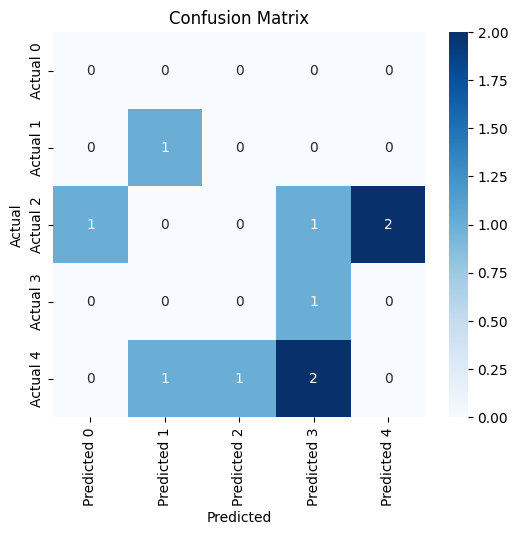

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Given arrays
actual = np.array([3, 4, 2, 4, 4, 1, 2, 2, 2, 4])
predicted = np.array([3, 2, 4, 1, 3, 1, 3, 4, 0, 3])

# Compute confusion matrix
labels = np.unique(np.concatenate((actual, predicted)))
conf_matrix = confusion_matrix(actual, predicted, labels=labels)

# Convert to DataFrame
conf_matrix_df = pd.DataFrame(conf_matrix, index=[f'Actual {i}' for i in labels],
                              columns=[f'Predicted {i}' for i in labels])

# Plot heatmap
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix_df, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()


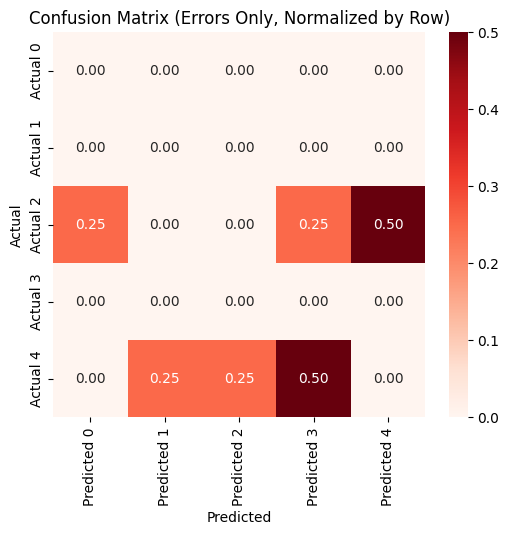

In [ ]:
# TODO: show confusion matrix with errors only and errors normalized by row
import matplotlib.pyplot as plt
import seaborn as sns

# Compute the confusion matrix
labels = np.unique(np.concatenate((actual, predicted)))
conf_matrix = confusion_matrix(actual, predicted, labels=labels)

# Convert to DataFrame
conf_matrix_df = pd.DataFrame(conf_matrix, index=[f'Actual {i}' for i in labels],
                              columns=[f'Predicted {i}' for i in labels])

# Normalize by row (actual values)
row_sums = conf_matrix_df.sum(axis=1).replace(0, 1)  # Avoid division by zero
conf_matrix_normalized = conf_matrix_df.div(row_sums, axis=0)

# Remove diagonal elements to keep only errors
for i in range(len(labels)):
    conf_matrix_normalized.iloc[i, i] = 0

# Plot heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_normalized, annot=True, cmap="Reds", fmt=".2f")
plt.title("Confusion Matrix (Errors Only, Normalized by Row)")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

